In [21]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12
})

In [3]:
df = pd.read_csv("qualiatrics_labels_stripped.csv")

dict = {"Q3" : "slide_experience", "Q5" : "poster_experience", "Q6" : "poster engagement\n(viewer)", "Q7" : "poster engagement\n(presenter)",
       "Q8": "slide engagement\n(viewer)", "Q9": "slide engagement\n(presenter)", "Q4" : "Which took more time to prepare?", "Q11": "Which challenged you more?",
       "Q12" : "nervous in group", "Q20" : "nervous for", "Q13" : "Which did you learn more from as a viewer?", "Q15" : "Which did you learn more from as a presenter?",
       "Q16" : "Which were you more proud of?", "Q18" : "recommendation"}

In [4]:
keys = ["Q6", "Q7", "Q8", "Q9"]
for key in keys:
    print(dict[key])
    display(df[key].value_counts())
    print()

poster engagement
(viewer)


Q6
Moderately engaged    18
Highly engaged        14
Slightly engaged       2
Name: count, dtype: int64


poster engagement
(presenter)


Q7
Highly engaged        21
Moderately engaged    13
Name: count, dtype: int64


slide engagement
(viewer)


Q8
Moderately engaged    13
Slightly engaged      10
Highly engaged         8
Not engaged at all     3
Name: count, dtype: int64


slide engagement
(presenter)


Q9
Highly engaged        18
Moderately engaged    11
Slightly engaged       5
Name: count, dtype: int64

In [9]:
df["Q20"].value_counts()

Q20
Slide presentation     17
Poster presentation    10
The same for both       7
Name: count, dtype: int64

In [11]:
cols1 = ["Q3", "Q5"]
order1 = ["No", "Yes, a few times", "Yes, many times"]
cat_type1 = pd.CategoricalDtype(categories=order1, ordered = True)
df[cols1] = df[cols1].astype(cat_type1)

cols2 = ["Q6", "Q7", "Q8", "Q9"]
order2 = ["Slightly engaged", "Moderately engaged", "Highly engaged"]
cat_type2 = pd.CategoricalDtype(categories=order2, ordered = True)
df[cols2] = df[cols2].astype(cat_type2)

cols3 = ["Q12"]
order3 = ["Not nervous at all", "Slightly nervous", "Moderately nervous", "Very nervous"]
cat_type3 = pd.CategoricalDtype(categories=order3, ordered = True)
df[cols3] = df[cols3].astype(cat_type3)

cols4 = ["Q20"]
order4 = ["Poster presentation","Slide presentation",  "The same for both"]
cat_type4 = pd.CategoricalDtype(categories=order4, ordered = True)
df[cols4] = df[cols4].astype(cat_type4)

slide_experience


Q3
Yes, many times     23
Yes, a few times     9
No                   2
Name: count, dtype: int64

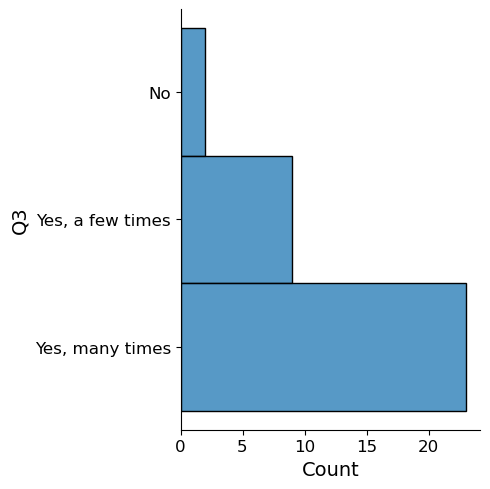

poster_experience


Q5
No                  17
Yes, a few times    14
Yes, many times      3
Name: count, dtype: int64

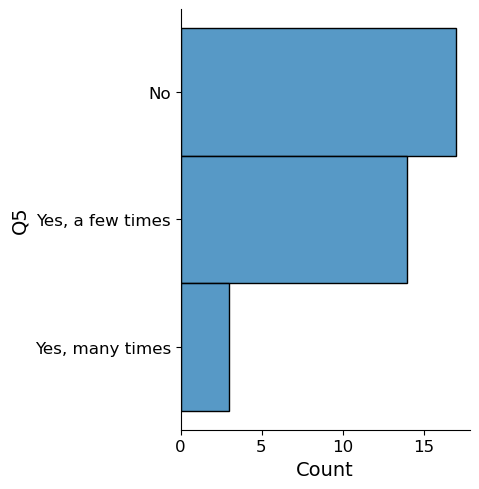

poster engagement
(viewer)


Q6
Moderately engaged    18
Highly engaged        14
Slightly engaged       2
Name: count, dtype: int64

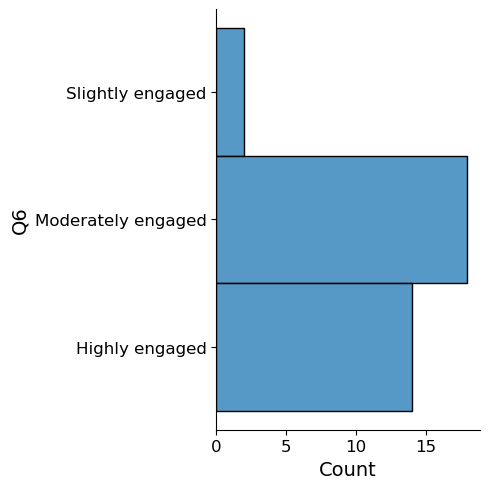

poster engagement
(presenter)


Q7
Highly engaged        21
Moderately engaged    13
Slightly engaged       0
Name: count, dtype: int64

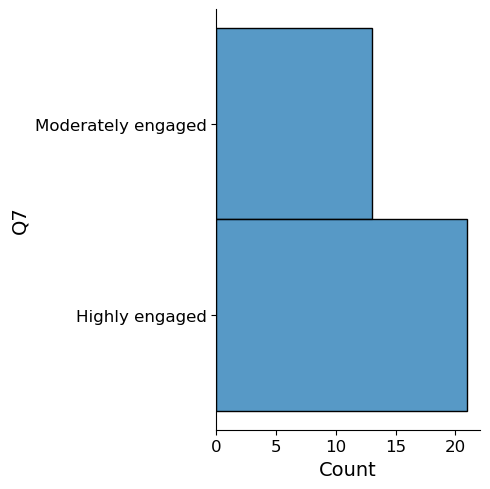

slide engagement
(viewer)


Q8
Moderately engaged    13
Slightly engaged      10
Highly engaged         8
Name: count, dtype: int64

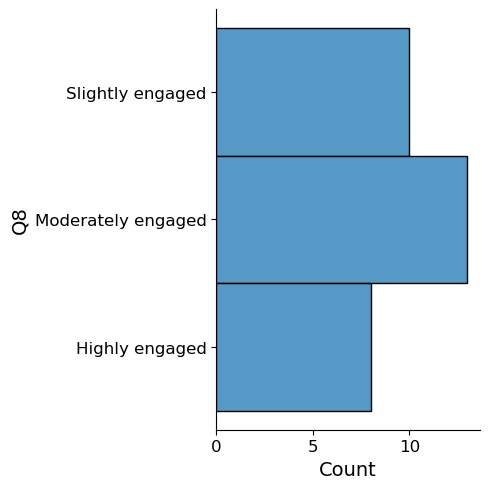

slide engagement
(presenter)


Q9
Highly engaged        18
Moderately engaged    11
Slightly engaged       5
Name: count, dtype: int64

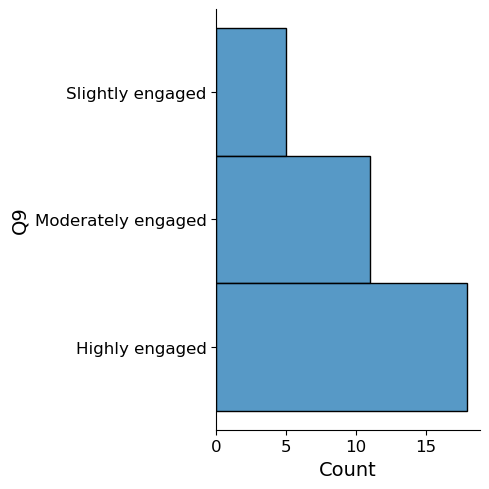

Which took more time to prepare?


Q4
The poster presentation                             15
The slide presentation                              11
Both took an equal amount of time to prepare for     8
Name: count, dtype: int64

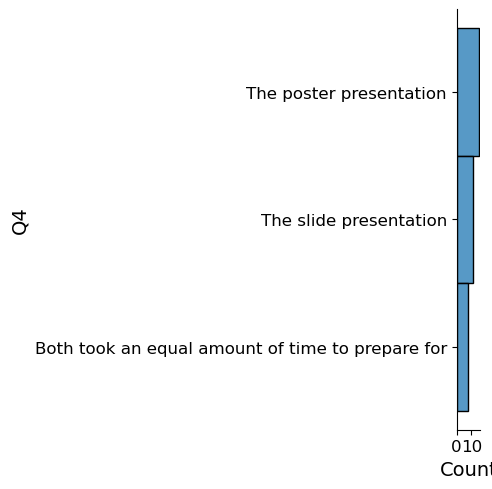

Which challenged you more?


Q11
The poster presentation               21
The slide presentation                10
Both challenged me the same amount     3
Name: count, dtype: int64

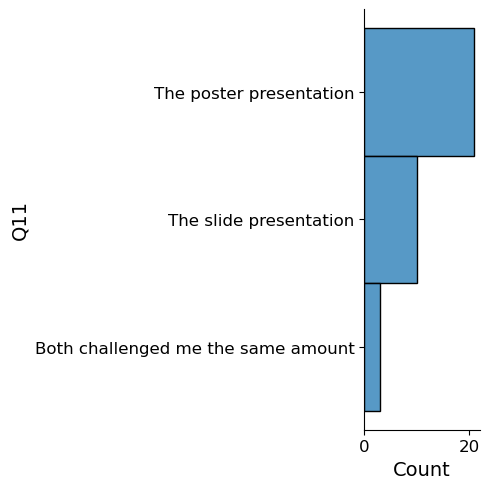

nervous in group


Q12
Slightly nervous      15
Moderately nervous     8
Very nervous           6
Not nervous at all     5
Name: count, dtype: int64

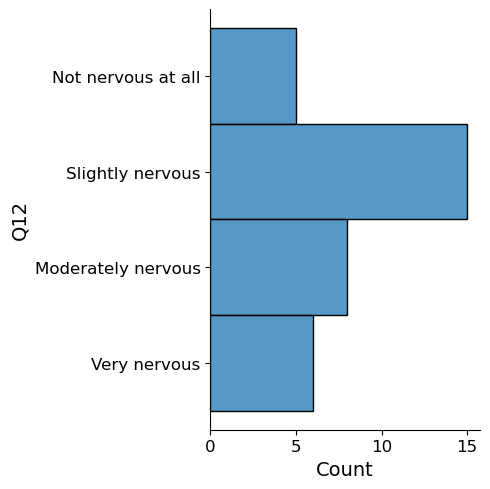

nervous for


Q20
Slide presentation     17
Poster presentation    10
The same for both       7
Name: count, dtype: int64

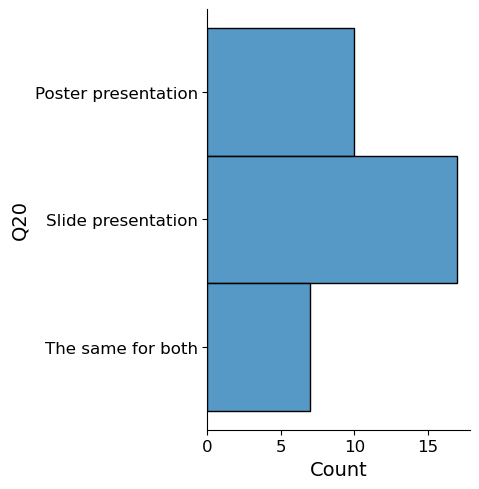

Which did you learn more from as a viewer?


Q13
Poster presentations                   21
Slide presentations                     7
I learned an equal amount from both     6
Name: count, dtype: int64

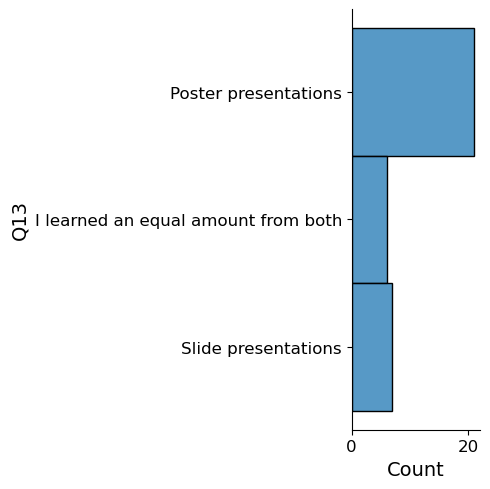

Which did you learn more from as a presenter?


Q15
Poster presentations                   23
Slide presentations                     6
I learned an equal amount from both     5
Name: count, dtype: int64

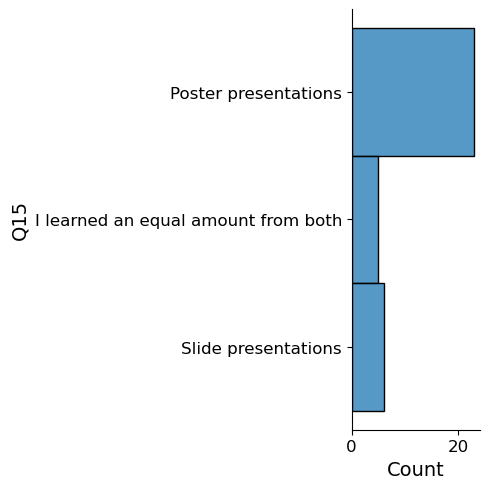

Which were you more proud of?


Q16
My poster presentation          22
I feel equally proud of both     8
My slide presentation            4
Name: count, dtype: int64

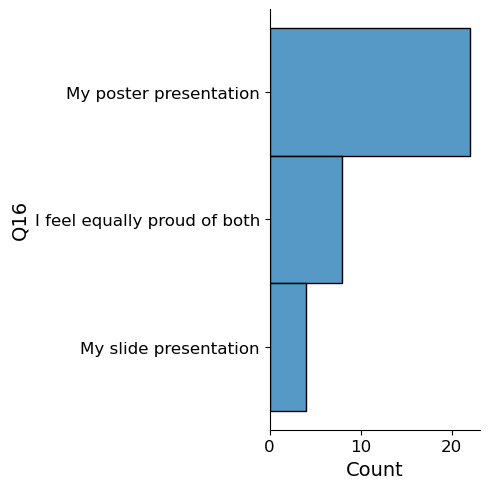

recommendation


Q18
One of each (like this semester)    19
Poster presentations                14
Slide presentations                  1
Name: count, dtype: int64

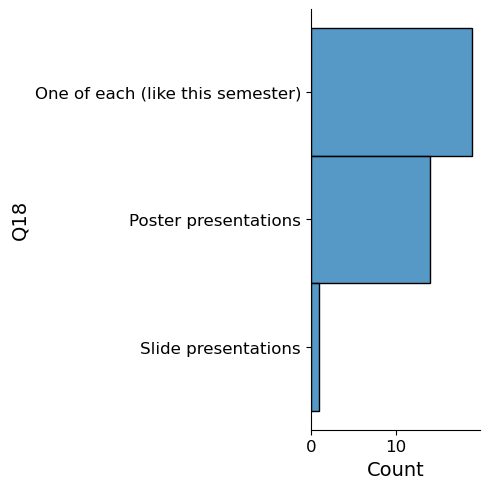

In [13]:
for k, v in dict.items():
    print(v)
    display(df[k].value_counts())
    sns.displot(df, y = k)
    plt.show()

In [14]:
#engagement_df = pd.DataFrame()
tmps = []
for k in ["Q6", "Q7", "Q8", "Q9"]:
    temp = df[[k]]
    temp.rename(columns={k : "engagement"},inplace=True)
    temp["mode"] = dict[k]
    tmps.append(temp)
engagement = pd.concat(tmps)
#cat_type2 = pd.CategoricalDtype(categories=order2, ordered = True)
engagement["engagement"] = engagement["engagement"].astype(cat_type2)

/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_63220/948715587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={k : "engagement"},inplace=True)
/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_63220/948715587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["mode"] = dict[k]
/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_63220/948715587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

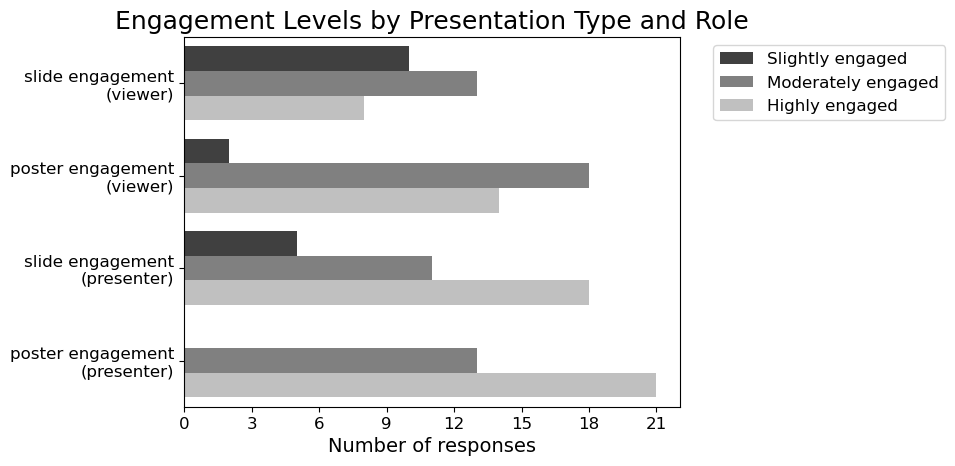

In [23]:
sns.countplot(engagement,y="mode", hue = "engagement",dodge=True, palette = "gray",order=["slide engagement\n(viewer)","poster engagement\n(viewer)", "slide engagement\n(presenter)", "poster engagement\n(presenter)"])
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Number of responses")
plt.title("Engagement Levels by Presentation Type and Role")
plt.ylabel("")
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.savefig("engagement.pdf",bbox_inches="tight")
plt.show()

Q5,No,"Yes, a few times","Yes, many times"
Q3,,,
No,2,0,0
"Yes, a few times",5,3,1
"Yes, many times",10,11,2


<Axes: xlabel='Q5', ylabel='Q3'>

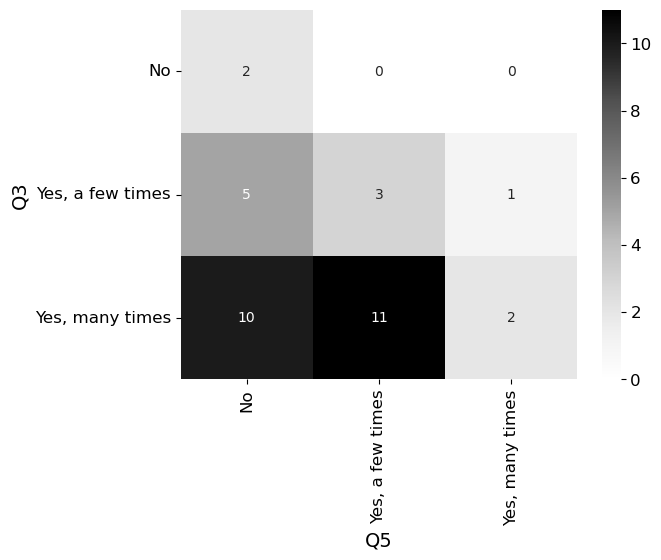

In [69]:
freq = pd.crosstab(df["Q3"], df["Q5"])
display(freq)

sns.heatmap(freq, annot=True, fmt="d", cmap="Greys")  # grayscale


Q20,Poster presentation,Slide presentation,The same for both
Q12,,,
Not nervous at all,0,3,2
Slightly nervous,6,7,2
Moderately nervous,2,4,2
Very nervous,2,3,1


<Axes: xlabel='Q20', ylabel='Q12'>

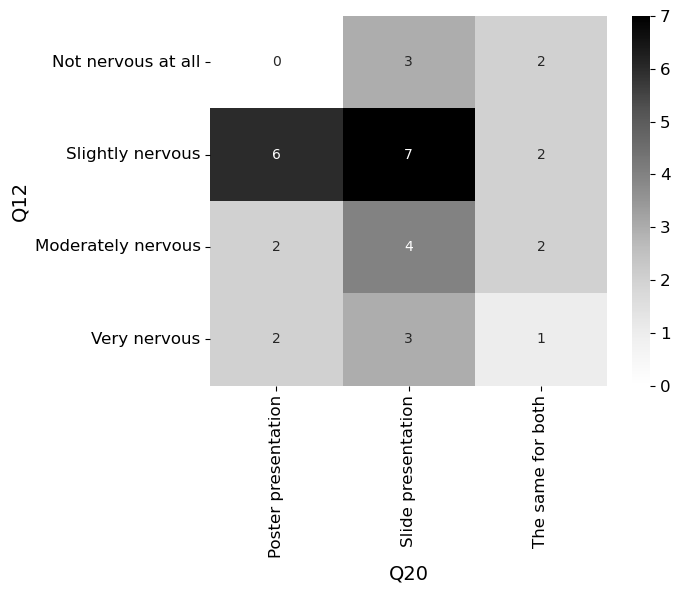

In [71]:
freq = pd.crosstab(df["Q12"], df["Q20"])
display(freq)

sns.heatmap(freq, annot=True, fmt="d", cmap="Greys")  # grayscale


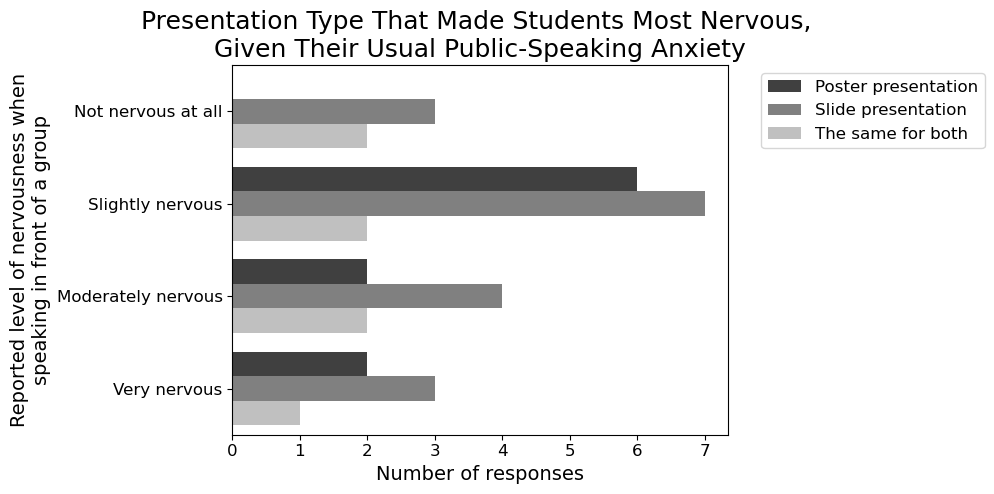

In [44]:
sns.countplot(df, y = "Q12", hue = "Q20", dodge = True, palette = "gray")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Number of responses")
plt.ylabel('Reported level of nervousness when\nspeaking in front of a group')
plt.title("Presentation Type That Made Students Most Nervous, \nGiven Their Usual Public-Speaking Anxiety")
plt.savefig("nervous_anxiety.pdf",bbox_inches="tight")
plt.show()

In [89]:
print(dict["Q20"])
df["Q20"].value_counts()

nervous for


Q20
Slide presentation     17
Poster presentation    10
The same for both       7
Name: count, dtype: int64

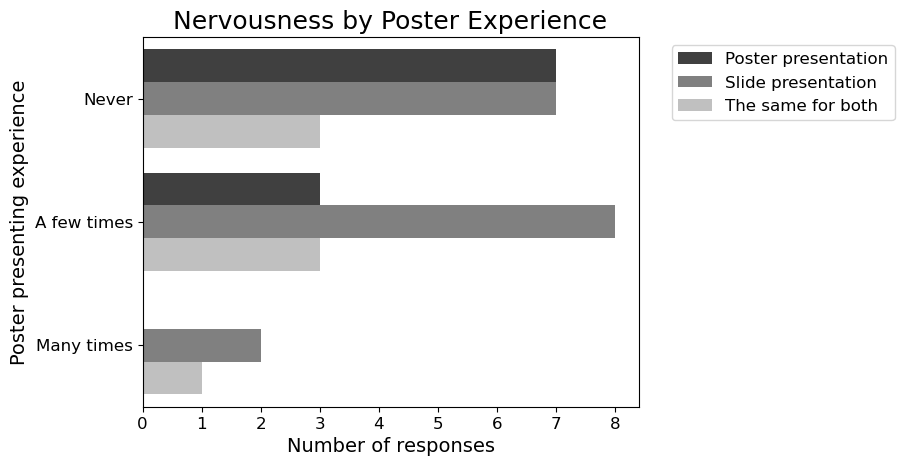

In [83]:
df["new_Q5"] = df["Q5"].map({"No" : "Never", "Yes, a few times" : "A few times", "Yes, many times" : "Many times"})
sns.countplot(df, y = "new_Q5", hue = "Q20", dodge = True, palette = "gray")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Number of responses")
plt.ylabel('Poster presenting experience')
plt.title("Nervousness by Poster Experience")
plt.savefig("nervous_experience.pdf",bbox_inches="tight")
plt.show()

In [25]:
#engagement_df = pd.DataFrame()
tmps = []
for k in ["Q4", "Q11", "Q13", "Q15", "Q16"]:
    temp = df[[k]]
    temp.rename(columns={k : "prepare"},inplace=True)
    temp["mode"] = dict[k]
    tmps.append(temp)
prepare = pd.concat(tmps)
prepare["prepare"] = prepare["prepare"].replace("Both took an equal amount of time to prepare for", "Both equal")
prepare["prepare"] = prepare["prepare"].replace("Both challenged me the same amount", "Both equal")
prepare["prepare"] = prepare["prepare"].replace("I feel equally proud of both", "Both equal")
prepare["prepare"] = prepare["prepare"].replace("My poster presentation", "The poster presentation")
prepare["prepare"] = prepare["prepare"].replace("My slide presentation", "The slide presentation")
prepare["prepare"] = prepare["prepare"].replace("Slide presentations", "The slide presentation")
prepare["prepare"] = prepare["prepare"].replace("Poster presentations", "The poster presentation")
prepare["prepare"] = prepare["prepare"].replace("I learned an equal amount from both", "Both equal")
#cat_type2 = pd.CategoricalDtype(categories=order2, ordered = True)
#engagement["engagement"] = engagement["engagement"].astype(cat_type2)

/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_10186/4206863850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={k : "prepare"},inplace=True)
/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_10186/4206863850.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["mode"] = dict[k]
/var/folders/gp/bh_l0m390v3gkpbxg4p3m9hc0000gr/T/ipykernel_10186/4206863850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [27]:
prepare["prepare"].value_counts()

prepare
The poster presentation    102
The slide presentation      38
Both equal                  30
Name: count, dtype: int64

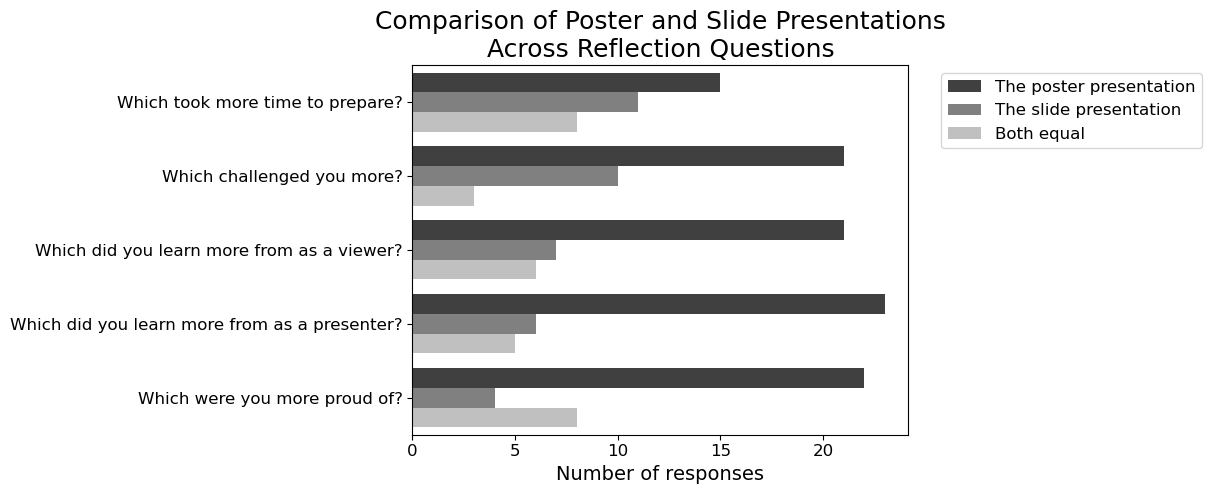

In [29]:
sns.countplot(prepare,y="mode", hue = "prepare",dodge=True, palette = "gray")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylabel("")
plt.xlabel("Number of responses")
plt.title("Comparison of Poster and Slide Presentations\nAcross Reflection Questions")
plt.savefig("reflection.pdf",bbox_inches="tight")

plt.show()

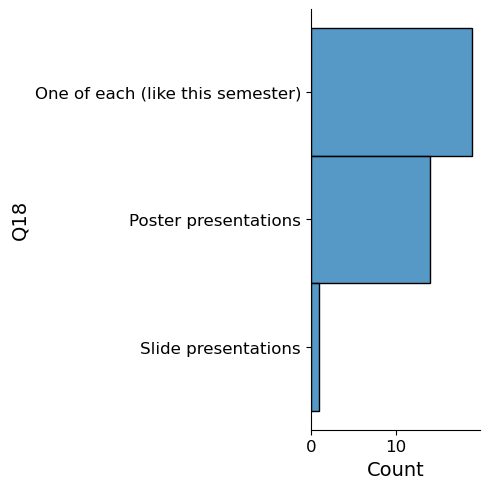

In [31]:
sns.displot(df, y = "Q18")
plt.show()

In [33]:
df["Q18"].value_counts()

Q18
One of each (like this semester)    19
Poster presentations                14
Slide presentations                  1
Name: count, dtype: int64